# dominating set

Set up calculations and store in EspressoDB

In [1]:
import matplotlib.pylab as plt
import seaborn as sns
import os

os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"
import numpy as np
import pandas as pd

from qlp.mds import graph_tools as gt
from qlp.mds.qubo import get_mds_qubo
from qlp.mds.solver import classical_search
from qlp.mds.mds_qlpdb import (
    graph_summary,
    experiment_summary,
    data_summary,
    insert_result,
    QUBO_to_Ising,
    retry_embedding,
    find_offset,
    AnnealOffset,
    plot_anneal_offset,
)

import networkx as nx
from networkx import Graph
from networkx.drawing.nx_pylab import draw
from networkx.algorithms.approximation import min_weighted_dominating_set
from networkx.algorithms.dominating import dominating_set

from dwave.system.samplers import DWaveSampler
from minorminer import find_embedding
from dwave.system.composites import EmbeddingComposite, FixedEmbeddingComposite

In [2]:
# plot anneal offset ranges
#solver = "DW_2000Q_5"
#sampler = DWaveSampler(solver=solver)
#plot_anneal_offset(sampler)

spin reversal: 5


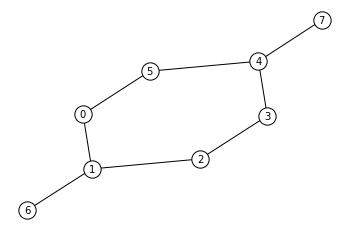

{'tag': 'lC19(2,0)', 'total_vertices': 8, 'total_edges': 8, 'total_qubits': 22, 'max_edges': 3, 'adjacency': [[0, 1], [1, 2], [4, 7], [4, 5], [2, 3], [1, 6], [5, 0], [3, 4]], 'adjacency_hash': '011eaccfd14c131af77e0c35bd592c73'}
Greedy solution
 {0, 2, 4, 6}
Solving 49/49spin reversal: 5


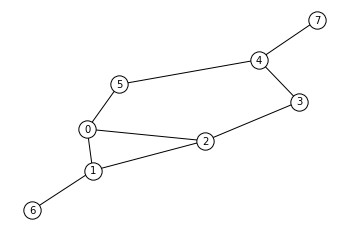

{'tag': 'lC19(2,1)', 'total_vertices': 8, 'total_edges': 9, 'total_qubits': 22, 'max_edges': 3, 'adjacency': [[0, 1], [1, 2], [4, 7], [4, 5], [2, 3], [1, 6], [5, 0], [3, 4], [0, 2]], 'adjacency_hash': 'b48c88a5fc2161cf559182fc49bd3ac4'}
Greedy solution
 {0, 3, 6, 7}
Solving 49/49spin reversal: 5


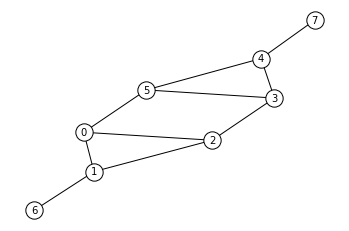

{'tag': 'lC19(2,2)', 'total_vertices': 8, 'total_edges': 10, 'total_qubits': 22, 'max_edges': 3, 'adjacency': [[0, 1], [1, 2], [4, 7], [4, 5], [2, 3], [1, 6], [5, 0], [3, 4], [0, 2], [3, 5]], 'adjacency_hash': '61de367bd3e8fb72eea8a36f926de102'}
Greedy solution
 {0, 3, 6, 7}
Solving 49/49spin reversal: 5


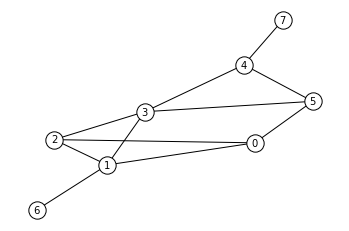

{'tag': 'lC19(2,3)', 'total_vertices': 8, 'total_edges': 11, 'total_qubits': 24, 'max_edges': 4, 'adjacency': [[0, 1], [1, 2], [4, 7], [1, 3], [4, 5], [2, 3], [1, 6], [5, 0], [3, 4], [0, 2], [3, 5]], 'adjacency_hash': '1b7d04a532adcc596ee7e52267c54f67'}
Greedy solution
 {0, 3, 6, 7}
Solving 49/49spin reversal: 5


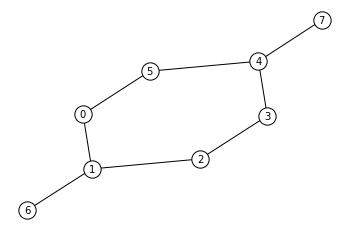

{'tag': 'lC19(2,0)', 'total_vertices': 8, 'total_edges': 8, 'total_qubits': 22, 'max_edges': 3, 'adjacency': [[0, 1], [1, 2], [4, 7], [4, 5], [2, 3], [1, 6], [5, 0], [3, 4]], 'adjacency_hash': '011eaccfd14c131af77e0c35bd592c73'}
Greedy solution
 {0, 2, 4, 6}
Solving 49/49spin reversal: 5


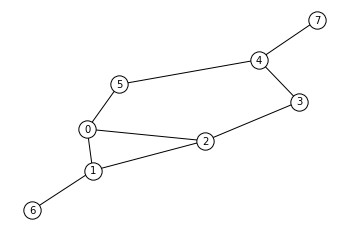

{'tag': 'lC19(2,1)', 'total_vertices': 8, 'total_edges': 9, 'total_qubits': 22, 'max_edges': 3, 'adjacency': [[0, 1], [1, 2], [4, 7], [4, 5], [2, 3], [1, 6], [5, 0], [3, 4], [0, 2]], 'adjacency_hash': 'b48c88a5fc2161cf559182fc49bd3ac4'}
Greedy solution
 {0, 3, 6, 7}
Solving 49/49spin reversal: 5


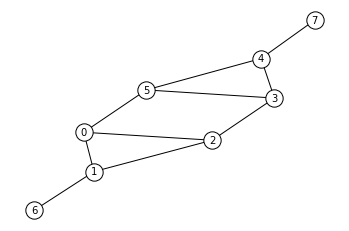

{'tag': 'lC19(2,2)', 'total_vertices': 8, 'total_edges': 10, 'total_qubits': 22, 'max_edges': 3, 'adjacency': [[0, 1], [1, 2], [4, 7], [4, 5], [2, 3], [1, 6], [5, 0], [3, 4], [0, 2], [3, 5]], 'adjacency_hash': '61de367bd3e8fb72eea8a36f926de102'}
Greedy solution
 {0, 3, 6, 7}
Solving 49/49spin reversal: 5


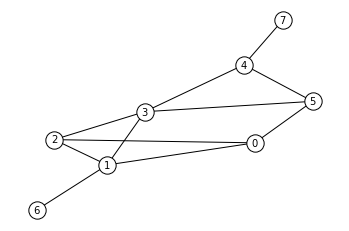

{'tag': 'lC19(2,3)', 'total_vertices': 8, 'total_edges': 11, 'total_qubits': 24, 'max_edges': 4, 'adjacency': [[0, 1], [1, 2], [4, 7], [1, 3], [4, 5], [2, 3], [1, 6], [5, 0], [3, 4], [0, 2], [3, 5]], 'adjacency_hash': '1b7d04a532adcc596ee7e52267c54f67'}
Greedy solution
 {0, 3, 6, 7}
Solving 49/49spin reversal: 5


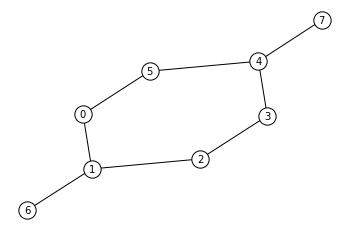

{'tag': 'lC19(2,0)', 'total_vertices': 8, 'total_edges': 8, 'total_qubits': 22, 'max_edges': 3, 'adjacency': [[0, 1], [1, 2], [4, 7], [4, 5], [2, 3], [1, 6], [5, 0], [3, 4]], 'adjacency_hash': '011eaccfd14c131af77e0c35bd592c73'}
Greedy solution
 {0, 2, 4, 6}
Solving 49/49spin reversal: 5


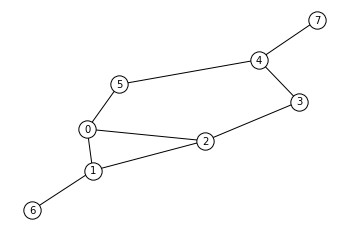

{'tag': 'lC19(2,1)', 'total_vertices': 8, 'total_edges': 9, 'total_qubits': 22, 'max_edges': 3, 'adjacency': [[0, 1], [1, 2], [4, 7], [4, 5], [2, 3], [1, 6], [5, 0], [3, 4], [0, 2]], 'adjacency_hash': 'b48c88a5fc2161cf559182fc49bd3ac4'}
Greedy solution
 {0, 3, 6, 7}
Solving 49/49spin reversal: 5


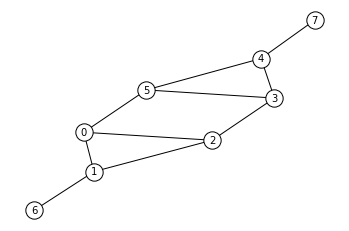

{'tag': 'lC19(2,2)', 'total_vertices': 8, 'total_edges': 10, 'total_qubits': 22, 'max_edges': 3, 'adjacency': [[0, 1], [1, 2], [4, 7], [4, 5], [2, 3], [1, 6], [5, 0], [3, 4], [0, 2], [3, 5]], 'adjacency_hash': '61de367bd3e8fb72eea8a36f926de102'}
Greedy solution
 {0, 3, 6, 7}
Solving 49/49spin reversal: 5


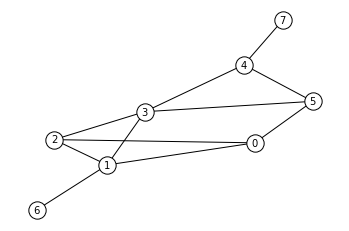

{'tag': 'lC19(2,3)', 'total_vertices': 8, 'total_edges': 11, 'total_qubits': 24, 'max_edges': 4, 'adjacency': [[0, 1], [1, 2], [4, 7], [1, 3], [4, 5], [2, 3], [1, 6], [5, 0], [3, 4], [0, 2], [3, 5]], 'adjacency_hash': '1b7d04a532adcc596ee7e52267c54f67'}
Greedy solution
 {0, 3, 6, 7}
Solving 49/49
DONE


In [6]:
# Define Adjacency matrix
# graph, tag = gt.generate_nn_graph(v)
# graph, tag = gt.generate_hamming_graph(d, v)
# graph, tag = gt.generate_bipartite_graph(p, q)
# graph, tag = gt.generate_newman_watts_strogatz_graph(v, n, p)
# graph, tag = gt.generate_corona_graph(k, n)

# Define anneal offset
# "constant": no offset
# "linear": linear with respect to |h|

#for offsetx in [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10]:
for pmin in [-0.05]:
    for offtype in ["negbinary","constant","binary"]:
        for nvertices in range(0, 4):
            for at in [600]:
                for srt in [5]:
                    print("spin reversal:", srt)
                    """User defined inputs"""
                    # Define graph
                    graph, tag = gt.generate_limited_corona_graph(2, nvertices)
                    #graph, tag = gt.generate_nn_graph(nvertices)
                    penalty = 2
                    # Embedding retries
                    retries = 100000
                    # Set functional form of anneal offset
                    target_min = -0.05
                    target_range = 0.10
                    problem_min = pmin
                    problem_range = -2*pmin
                    offsetcls = AnnealOffset(offtype)
                    # DWave parameters
                    annealing_time = at  # integer microseconds [1, 2000] #OPTIMIZED
                    answer_mode = "raw"  # histogram or raw
                    auto_scale = True
                    num_reads = 1000  # raw will dump out all results
                    num_spin_reversal_transforms = srt # OPTIMIZED
                    readout_thermalization = 0  # default 0
                    programming_thermalization = 1000  # default 1000
                    # Iterate for more statistics
                    iterations = 49
                    insertdb = True

                    """Start program"""
                    # get qubo
                    directed = False
                    qubo = get_mds_qubo(
                        graph, directed=directed, penalty=penalty, triangularize=True, dtype="d"
                    )
                    q_min = np.array(list(qubo.values())).min()

                    # plot graph
                    gt.get_plot(graph, directed=directed)
                    plt.show()
                    graph_params = graph_summary(tag, graph, qubo)
                    print(graph_params)

                    # greedy solution
                    G = nx.Graph()
                    G.add_edges_from(graph)
                    print("Greedy solution\n", dominating_set(G))

                    # convert to Ising
                    J, h, C = QUBO_to_Ising(qubo.todense().tolist())
                    maxJ = max(abs(J).flatten())
                    maxh = max(abs(h))

                    # Set chain strength
                    chain_strength = maxJ * 2

                    # DWave settings
                    solver = "DW_2000Q_5"
                    sampler = DWaveSampler(solver=solver)

                    qpu_graph = sampler.edgelist
                    qubo_dict = {key: val for key, val in zip(qubo.keys(), qubo.values())}

                    for idx in range(iterations):
                        print(f"\rSolving {idx+1}/{iterations}", end="")
                        embed, embedding, min_offset, max_offset = retry_embedding(
                            sampler=sampler,
                            qubo_dict=qubo_dict,
                            qpu_graph=qpu_graph,
                            graph_tag=tag,
                            target_min=target_min,
                            target_range=target_range,
                            n_tries=retries,
                        )
                        anneal_offsets, exp_tag = find_offset(
                            h=h,
                            fcn=offsetcls.fcn,
                            embedding=embedding,
                            offset_min=problem_min,
                            offset_range=problem_range,
                        )
                        dwave_config = {
                            "annealing_time": annealing_time,  # integer microseconds [1, 2000]
                            "answer_mode": answer_mode,  # histogram or raw
                            "auto_scale": auto_scale,
                            "num_reads": num_reads,  # raw will dump out all results
                            "num_spin_reversal_transforms": num_spin_reversal_transforms,
                            "readout_thermalization": readout_thermalization,  # default 0
                            "programming_thermalization": programming_thermalization,  # default 1000
                            "chain_strength": chain_strength,
                            "anneal_offsets": anneal_offsets,
                        }

                        experiment_params = experiment_summary(
                            machine=solver,
                            settings=dwave_config,
                            penalty=penalty,
                            chain_strength=chain_strength,
                            tag=exp_tag,
                        )

                        # Solve on DWave and push to database
                        result = embed.sample_qubo(qubo_dict, **dwave_config)
                        raw = result.to_pandas_dataframe()
                        data_params = data_summary(raw, graph_params, experiment_params)
                        if insertdb:
                            result = insert_result(graph_params, experiment_params, data_params)
                        #print(raw.sort_values("energy", ascending=True))
print("\nDONE")

In [ ]:
raw.sort_values("energy", ascending=True)